In [1]:
from Modules import PortfolioState, WeeklyPortfolioManager
from Modules import TradingDay, TradingWeek, PredictionFetcher, DateHelper
import datetime


date_helper = DateHelper()
start_date = '20240126'
last_state = PortfolioState(1, 1, 1, 1, 4000, 1)
manager = WeeklyPortfolioManager()
predict_fetcher = PredictionFetcher('dataset\daily_data.xlsx')

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.
Wind terminal started successfully.
Wind terminal started successfully.


In [2]:
init_week = TradingWeek(date_helper.convert_to_datetime(start_date) + datetime.timedelta(days=7))
init_state = PortfolioState()
init_state.last_signal = predict_fetcher.get_prediction_for_date(start_date)

In [3]:
all_res = []
no_intra = []

In [4]:
last_state = init_state
this_week = init_week

In [5]:
for date in date_helper.generate_date_range(date_helper.convert_to_datetime(start_date) + datetime.timedelta(days=7), '20240829', 7):
    this_week = TradingWeek(date)
    if not this_week.has_trading_days:
        continue
    this_week.intra_reposition = False
    
    manager.manage_portfolio_weekly(last_state=last_state, this_week=this_week)
    last_state = manager.state
    all_res.append(last_state)



In [6]:
manager.manage_portfolio_weekly(init_state, init_week)

PortfolioState(nav=array([1.06051164]), nav_final=array([1.06051164]), position=1, position_size=0.5, last_trade_price=array([4864.89695161]), last_signal=1)

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt_list = [x.nav for x in all_res]

In [11]:
plt_list


[1,
 array([1.18468266]),
 array([1.41033403]),
 array([1.34674955]),
 array([1.38351967]),
 array([1.38321065]),
 array([1.43244681]),
 array([1.43305295]),
 array([1.44935174]),
 array([1.43762361]),
 array([1.47517621]),
 array([1.49271317]),
 array([1.42738275]),
 array([1.45190805]),
 array([1.43707881]),
 array([1.45120549]),
 array([1.37540098]),
 array([1.38064732]),
 array([1.42944424]),
 array([1.41224233]),
 array([1.48572784]),
 array([1.50657236]),
 array([1.5468172]),
 array([1.51204916]),
 array([1.51227887]),
 array([1.55958114]),
 array([1.59533293]),
 array([1.56471053]),
 array([1.55760603])]

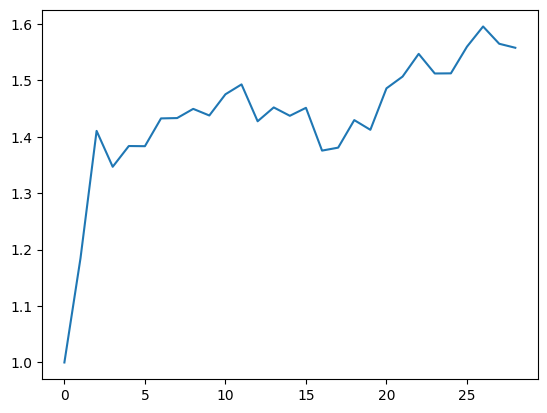

In [10]:
plt.plot(plt_list)